In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
N = 3

# hidden probabilities
means = np.array([0.15, 0.8, 0.5])

# current probabilities
probs = np.zeros(N)

# number of successes for each machine
S = np.zeros(N, dtype=np.int)

# number of failures for each machine
F = np.zeros(N, dtype=np.int)

rnd = np.random.RandomState(7)

## Thompson sampling

In [9]:
num_trials = 100

total_wins = 0

# number of wins at each trial number
wins = np.zeros(num_trials)

for trial in range(num_trials):
    print("Trial {}".format(trial))
    for i in range(N):
        
        # draw from random sample
        probs[i] = rnd.beta(S[i]+1, F[i]+1)
        
    print(probs)
    machine = np.argmax(probs)
    print("Playing machine {}".format(machine))
    
    # draw from a random uniform distribution
    p = rnd.random_sample()
    if p < means[machine]:
        print(" -- win!")
        S[machine] += 1
        total_wins += 1
    else:
        print(" -- lose")
        F[machine] += 1
        
    wins[trial] = (total_wins)/(trial+1)
        
print("Total wins {}".format(total_wins))

Trial 0
[0.08800385 0.76030685 0.5052828 ]
Playing machine 1
 -- win!
Trial 1
[0.15748338 0.8022686  0.52418138]
Playing machine 1
 -- lose
Trial 2
[0.15734823 0.77054022 0.48795185]
Playing machine 1
 -- win!
Trial 3
[0.11212543 0.75924072 0.62691664]
Playing machine 1
 -- win!
Trial 4
[0.12964154 0.77293734 0.48599599]
Playing machine 1
 -- lose
Trial 5
[0.09545224 0.75689076 0.6320101 ]
Playing machine 1
 -- win!
Trial 6
[0.01867746 0.77936473 0.70155622]
Playing machine 1
 -- win!
Trial 7
[0.44065464 0.80106868 0.49069203]
Playing machine 1
 -- win!
Trial 8
[0.06224374 0.8063294  0.5113969 ]
Playing machine 1
 -- win!
Trial 9
[0.08973039 0.79527677 0.66992897]
Playing machine 1
 -- win!
Trial 10
[0.09471753 0.77701125 0.5930975 ]
Playing machine 1
 -- win!
Trial 11
[0.10113079 0.77460443 0.60934999]
Playing machine 1
 -- lose
Trial 12
[0.62911387 0.78691578 0.67141421]
Playing machine 1
 -- win!
Trial 13
[0.22544098 0.78291207 0.55001323]
Playing machine 1
 -- win!
Trial 14
[0.2579

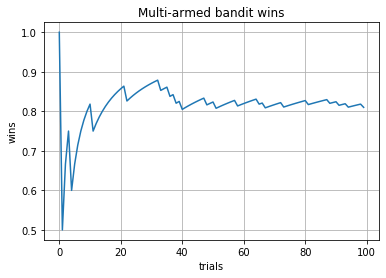

In [11]:
fig, ax = plt.subplots()
ax.plot(wins)

ax.set(xlabel='trials', ylabel='wins',
       title='Multi-armed bandit wins')
ax.grid()

# fig.savefig("test.png")
plt.show()

In [160]:
print(probs)

[0.53039237 0.84946575 0.7822984 ]


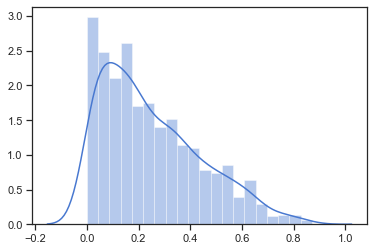

In [174]:
data = [np.random.beta(x+1, y+1, 1000) for x, y, in zip(S, F)]

sns.distplot(data[0], bins=20, kde=True)

In [175]:
import seaborn as sns
sns.set(style="ticks", palette="muted")
# sns.set(color_codes=True)
# sns.set_context('paper')  #Everything is larger


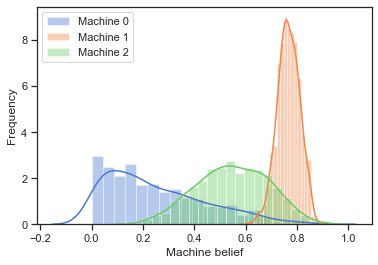

In [176]:
for i in range(N):
    ax = sns.distplot(data[i],
                     bins=20,
                     kde=True,
                     label='Machine {}'.format(i),
                     )


ax.set(xlabel='Machine belief', ylabel='Frequency')
ax.legend()
plt.savefig('foo.svg')